Introduction

Goal: This notebook aims to clean the data obtained as a result of web scrapping and perform statistical tests to check which features have an influence on the amount of salary

Content
1. Short Data exploration
2. Cleaning the data
3. Creating the final dataset
4. Performing statistical tests
5. Tests explanation
6. Summary and next steps

**1. Short Data exploration**

Download libraries and dataset, adjust display settings:

In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
pd.set_option('display.max_columns', None)
cols = ['miasto', 'kod_pocztowy']

table = pd.read_csv('D_N_TOTAL.csv')

The data I am using was obtained through web scraping. Some of them have already been properly formatted, but it is easy to notice that the data requires organization. The subsequent columns are a formatted repetition of what we can find in the earlier columns, and many of them will need to be removed. Some columns still need formatting like avg_children_age which has a list type of data instead of a numeric value.

For now dataset consists of 42 columns and over 5000 rows

In [2]:
table.shape

(5316, 42)

In [3]:
table.head()

,Unnamed: 0,Unnamed: 0.1,date,address,salary,job,author,experience,nannys_age,additional_requirements,L1,L2,children_info,n_children,extraction_date,data,district,city,max_stawka,date2,job_offer_date,date_number,offer_source,avg_expected_nannys_age,avg_children_age,axg_expected_experience,full_time,part_time,casual,once,non_smoker,photo,accepts_animals,twins_experience,cooking,walks,creativity,music,sport,cleaning,laundry,driving_license
0,0,0,18 lutego 2023,"Lubomino, 11-135",do 15 zł za godzinę,['Część etatu'],,,brak,['Preferowany wiek niani: ...,Polski,,"['Chłopiec, 1 - 3 lat']",1,2023-03-02,NaN,Lubomino,lubomino,15,18 lutego 2023,2023-02-18,118,m,0.0,"[1, 3]",0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,26 lutego 2023,"Olsztyn Jaroty, 10-699",do 15 zł za godzinę,"['Pełny etat', 'Część etatu']",Mariusz B.,brak,dowolny wiek,"['Osoba niepaląca', 'Spacery', 'Kreatywność', ...",Polski,,"['Chłopiec, 1 - 3 lat']",1,2023-03-02,NaN,Olsztyn Jaroty,olsztyn,15,26 lutego 2023,2023-02-26,126,m,0.0,"[1, 3]",0.0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0
2,2,2,13 lutego 2023,"Olsztyn, 10-693",do 30 zł za godzinę,['Część etatu'],Monika S.,brak,dowolny wiek,"['Akceptuje obecność zwierząt', 'Spacery']",Polski,,"['Chłopiec, 3 - 6 lat']",1,2023-03-02,NaN,Olsztyn,olsztyn,30,13 lutego 2023,2023-02-13,113,k,0.0,"[3, 6]",0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,3,3,26 lutego 2023,"Kieźliny, 10-371",do 30 zł za godzinę,['Część etatu'],,brak,dowolny wiek,"['Osoba niepaląca', 'Posiada prawo jazdy', 'Po...",,,"['Chłopiec, Poniżej 1 roku życia']",1,2023-03-02,NaN,Kieźliny,kieźliny,30,26 lutego 2023,2023-02-26,126,m,0.0,[1],0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,4,4,22 lutego 2023,"Olsztyn Dajtki, 10-900",do 25 zł za godzinę,['Część etatu'],Stefania K.,poniżej 2 lat,dowolny wiek,"['Osoba niepaląca', 'Spacery', 'Kreatywność', ...",,,"['Dziewczynka, 3 - 6 lat']",1,2023-03-02,NaN,Olsztyn Dajtki,olsztyn,25,22 lutego 2023,2023-02-22,122,k,0.0,"[3, 6]",2.0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0


**2. Cleaning the data**

- city

There are typos in the column with the city name that needs to be changed. I am also checking how many offers come from each city and keeping only those with a number of offers above 20.

In [4]:
cities = []

In [5]:
for x in table['district']:
    
    m = x.split(' ')[0].lower()
    if m == 'warszawawars':
        cities.append('warszawa')
    elif m == 'łodz':
        cities.append('łódź')
    else:
        cities.append(m)

In [6]:
table['city'] = cities

In [7]:
table.city.head()

0    lubomino
1     olsztyn
2     olsztyn
3    kieźliny
4     olsztyn
Name: city, dtype: object

In [8]:
m_l = table.groupby('city').agg({'city':'count'})

In [9]:
eml = m_l['city'].sort_values(ascending = False).head(25)

In [10]:
eml

city
warszawa               3306
kraków                  196
poznań                   98
gdańsk                   94
wrocław                  80
piaseczno                70
konstancin-jeziorna      62
łódź                     52
józefosław               46
katowice                 44
ożarów                   44
lublin                   40
legionowo                40
szczecin                 36
gdynia                   32
pruszków                 32
nadarzyn                 30
ząbki                    30
rzeszów                  28
raszyn                   28
piastów                  28
bydgoszcz                28
łomianki                 26
gliwice                  22
kielce                   22
Name: city, dtype: int64

In [11]:
for a in table['city'].index:
    if table['city'][a] not in eml:
        table['city'][a] = None

/home/marcin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Check which cities are in the table after column adjusting

In [12]:
table['city'].unique()

array([None, 'warszawa', 'ząbki', 'pruszków', 'raszyn', 'piaseczno',
       'piastów', 'konstancin-jeziorna', 'nadarzyn', 'ożarów', 'łomianki',
       'józefosław', 'katowice', 'gliwice', 'gdańsk', 'gdynia', 'łódź',
       'legionowo', 'wrocław', 'bydgoszcz', 'rzeszów', 'lublin',
       'szczecin', 'kraków', 'poznań', 'kielce'], dtype=object)

- salary

Checking how the salary column looks. The maximum salary amount is in a string so it's necessary to extract the numbers and remove the outliers

In [13]:
table.salary.unique()

array(['do 15 zł za godzinę', 'do 30 zł za godzinę',
       'do 25 zł za godzinę', 'do 35 zł za godzinę',
       'do 40 zł za godzinę', 'do 60 zł za godzinę',
       'do 50 zł za godzinę', 'do 38 zł za godzinę',
       'do 20 zł za godzinę', 'do 22 zł za godzinę',
       'do 24 zł za godzinę', 'do 26 zł za godzinę',
       'do 55 zł za godzinę', 'do 100 zł za godzinę',
       'do 45 zł za godzinę', 'do 27 zł za godzinę',
       'do 23 zł za godzinę', 'do 14 zł za godzinę',
       'do 28 zł za godzinę', 'do 90 zł za godzinę',
       'do 16 zł za godzinę', 'do 10 zł za godzinę',
       'do 18 zł za godzinę', 'do 17 zł za godzinę',
       'do 70 zł za godzinę', 'do 34 zł za godzinę',
       'do 49 zł za godzinę', 'do 65 zł za godzinę',
       'do 31 zł za godzinę', 'do 21 zł za godzinę',
       'do 78 zł za godzinę'], dtype=object)

In [14]:
def stawka(row):
    
    war = row['salary'].split(' ')
    war1 = int(war[1])
    return war1
    

In [15]:
table['max_salary'] = table.apply(stawka, axis=1)

Checking what are the values of salary columns and if there are any duplicates. Duplicates start with the value 55 so I want to remove all values equal to or greater than that treshold.

In [16]:
unique_sal = table.max_salary.unique()
sorted_sal = np.sort(unique_sal)[::-1]
sorted_sal

array([100,  90,  78,  70,  65,  60,  55,  50,  49,  45,  40,  38,  35,
        34,  31,  30,  28,  27,  26,  25,  24,  23,  22,  21,  20,  18,
        17,  16,  15,  14,  10])

In [17]:
def find_outliers(df, column_name, threshold=3):
    column_data = df[column_name]
    z_scores = np.abs((column_data - column_data.mean()) / column_data.std())
    outliers = column_data[z_scores > threshold]
    return outliers

In [18]:
unique_values = find_outliers(table, 'max_salary').unique()
sorted_values = np.sort(unique_values)
sorted_values

array([ 55,  60,  65,  70,  78,  90, 100])

In [19]:
def salary(row):
    
    war = row['salary'].split(' ')
    
    war1 = int(war[1])
    war1 = min(war1, 50)

    return war1

In [20]:
table['max_salary'] = table.apply(salary, axis=1)

In [21]:
table.max_salary.unique()

array([15, 30, 25, 35, 40, 50, 38, 20, 22, 24, 26, 45, 27, 23, 14, 28, 16,
       10, 18, 17, 34, 49, 31, 21])

Checking if there're any duplicates left

In [22]:
table['max_salary'].sort_values(ascending = False).head(5)

211     50
3936    50
1295    50
1315    50
3953    50
Name: max_salary, dtype: int64

- date

Checking the oldest date of adding the offer in the table, and subtracting the oldest date from each date in the table to obtain the number of days in between

In [23]:
table['job_offer_date'].sort_values().head(1)

1181    2022-10-23
Name: job_offer_date, dtype: object

In [24]:
def data_reg(row):
    if row['date2'].split(' ')[1] == 'stycznia':
        a = date(int(row['date2'].split(' ')[2]), 1 , int(row['date2'].split(' ')[0])) - date(2022,10,23)
        val = a.days
    elif row['date2'].split(' ')[1] == 'lutego':
        a = date(int(row['date2'].split(' ')[2]), 2, int(row['date2'].split(' ')[0])) - date(2022,10,23)
        val = a.days
    elif row['date2'].split(' ')[1] == 'marca':
        a = date(int(row['date2'].split(' ')[2]),3, int(row['date2'].split(' ')[0])) - date(2022,10,23)
        val = a.days
    elif row['date2'].split(' ')[1] == 'grudnia':
        a = date(int(row['date2'].split(' ')[2]), 12, int(row['date2'].split(' ')[0])) - date(2022,10,23)
        val = a.days
    elif row['date2'].split(' ')[1] == 'listopada':
        a = date(int(row['date2'].split(' ')[2]),11, int(row['date2'].split(' ')[0])) - date(2022,10,23)
        val = a.days
    elif row['date2'].split(' ')[1] == 'października':
        a = date(int(row['date2'].split(' ')[2]),10, int(row['date2'].split(' ')[0]))  - date(2022,10,23)
        val = a.days
    else:
        val = int(row['date2'].split(' ')[2]+row['date2'].split(' ')[1]+row['date2'].split(' ')[0])
    return val

In [25]:
table['date_numeric'] = table.apply(data_reg, axis=1)

In [26]:
table['date_numeric'].unique()

array([118, 126, 113, 122,  71, 115,  98, 127,  90, 125, 114, 105, 121,
       108, 120,  94, 107,  99,  39, 100, 128,  54, 124,  46, 106,  97,
       112, 117, 110,  82, 101, 111,  93,  88, 102, 119, 123, 104, 103,
        92,  76, 116,  66, 109,  69,  56,  41,  91,  77,  81,  72,  95,
        67,  42,  87, 130,  86, 129,  83,  73,  51,  60,  89,  52,  80,
        68,  85,  31,  78,  84,  96,  75,  10,  34,  74,  55,  58,  79,
        70,  32,  43,  63,  12,  59,  15,   9,  53,  47,  65,  57,  64,
         1,   3,  61,   0,  48])

- children

Add 2 columns with number of boys and girls for an offer to check whether the sex of the child affects the rate

In [27]:
children_dict = {'Dziewczynka': [], 'Chłopiec':[]}

In [28]:
for info in table['children_info']:
    for d in children_dict:
        children_dict[d].append(info.count(d))

In [29]:
tab_children = pd.DataFrame.from_dict(children_dict)

In [30]:
tab_children.rename(columns={'Dziewczynka': 'girl', 'Chłopiec':'boy'}, inplace=True)

In [31]:
tab_children.sample(5)

,girl,boy
5087,1,0
3700,0,1
601,1,0
2501,1,1
3694,1,0


- average children age

Changing average children age to numeric type of data

In [32]:
table.avg_children_age.sample(5)

1055          [3, 6]
789           [1, 3]
30      [3, 6, 1, 3]
2341          [1, 3]
1829          [3, 6]
Name: avg_children_age, dtype: object

In [33]:
def age_average(row):
    if type(row) != float:
        val = [int(s) for s in row.split() if s.isdigit()]
        if len(val) > 0:
            av = sum(val)/len(val)
        else:
            av = 0
    else:
        av = 0
    return av

In [34]:
table['avg_chld_age'] = table['children_info'].apply(age_average) 

In [35]:
table['avg_chld_age'].head()

0    2.0
1    2.0
2    4.5
3    1.0
4    4.5
Name: avg_chld_age, dtype: float64

- language

Checking how values in language column look now. 
Removing unnecessary spaces and extract the name of the language.

In [36]:
table['L1'].unique()

array(['Polski', ' ', '\n                    Polski\n                ',
       '\n                        Polski\n                    ', nan],
      dtype=object)

In [37]:
table['L1'] = table['L1'].str.replace(" ", "")

In [38]:
def jezyki(col):
    for a in table[col].index:
        if table[col][a] == '':
            table[col][a] = None
        elif type(table[col][a]) == type(1.0) and np.isnan(table[col][a]):
            table[col][a] = None

In [39]:
def languages(row):
    
    if type(row['L1']) == str:
        war = row['L1'].strip()        
     
        return war

In [40]:
table['lang1'] = table.apply(languages, axis=1)

In [41]:
def languages2(row):
    
    if type(row['L2']) == str:
        war = row['L2'].strip()        
     
        return war

In [42]:
table['lang2'] = table.apply(languages2, axis=1)

In [43]:
jezyki('lang1')

/home/marcin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
jezyki('lang2')

/home/marcin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [45]:
table.lang1.unique()

array(['Polski', None], dtype=object)

In [46]:
table.lang2.unique()

array([None, 'Polski'], dtype=object)

**3. Creating final dataset**

Join the main table and table with number of boys and girls

In [47]:
offers = pd.concat([table, tab_children], axis=1)

In [48]:
offers = offers.replace('\n','', regex=True)

Removing unnecessary columns

In [49]:
offers.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'address', 'salary', 'job',
       'author', 'experience', 'nannys_age', 'additional_requirements', 'L1',
       'L2', 'children_info', 'n_children', 'extraction_date', 'data',
       'district', 'city', 'max_stawka', 'date2', 'job_offer_date',
       'date_number', 'offer_source', 'avg_expected_nannys_age',
       'avg_children_age', 'axg_expected_experience', 'full_time', 'part_time',
       'casual', 'once', 'non_smoker', 'photo', 'accepts_animals',
       'twins_experience', 'cooking', 'walks', 'creativity', 'music', 'sport',
       'cleaning', 'laundry', 'driving_license', 'max_salary', 'date_numeric',
       'avg_chld_age', 'lang1', 'lang2', 'girl', 'boy'],
      dtype='object')

In [50]:
offers.city.unique()

array([None, 'warszawa', 'ząbki', 'pruszków', 'raszyn', 'piaseczno',
       'piastów', 'konstancin-jeziorna', 'nadarzyn', 'ożarów', 'łomianki',
       'józefosław', 'katowice', 'gliwice', 'gdańsk', 'gdynia', 'łódź',
       'legionowo', 'wrocław', 'bydgoszcz', 'rzeszów', 'lublin',
       'szczecin', 'kraków', 'poznań', 'kielce'], dtype=object)

In [51]:
offers = offers.drop(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'address', 'salary', 'job', 'author', 'experience', 'nannys_age', 'additional_requirements',
       'L1', 'L2', 'children_info', 'extraction_date', 'data',
       'district', 'max_stawka', 'date2', 'job_offer_date','date_number', 'avg_children_age'], axis=1)

Checking which columns are in the final table

In [52]:
offers.columns

Index(['n_children', 'city', 'offer_source', 'avg_expected_nannys_age',
       'axg_expected_experience', 'full_time', 'part_time', 'casual', 'once',
       'non_smoker', 'photo', 'accepts_animals', 'twins_experience', 'cooking',
       'walks', 'creativity', 'music', 'sport', 'cleaning', 'laundry',
       'driving_license', 'max_salary', 'date_numeric', 'avg_chld_age',
       'lang1', 'lang2', 'girl', 'boy'],
      dtype='object')

In [53]:
offers.head()

,n_children,city,offer_source,avg_expected_nannys_age,axg_expected_experience,full_time,part_time,casual,once,non_smoker,photo,accepts_animals,twins_experience,cooking,walks,creativity,music,sport,cleaning,laundry,driving_license,max_salary,date_numeric,avg_chld_age,lang1,lang2,girl,boy
0,1,None,m,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,118,2.0,Polski,None,0,1
1,1,None,m,0.0,0.0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,15,126,2.0,Polski,None,0,1
2,1,None,k,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,30,113,4.5,Polski,None,0,1
3,1,None,m,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,30,126,1.0,None,None,0,1
4,1,None,k,0.0,2.0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,25,122,4.5,None,None,1,0


Checking date types

In [54]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5316 entries, 0 to 5315
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_children               5316 non-null   int64  
 1   city                     4514 non-null   object 
 2   offer_source             5140 non-null   object 
 3   avg_expected_nannys_age  5192 non-null   float64
 4   axg_expected_experience  5106 non-null   float64
 5   full_time                5316 non-null   int64  
 6   part_time                5316 non-null   int64  
 7   casual                   5316 non-null   int64  
 8   once                     5316 non-null   int64  
 9   non_smoker               5316 non-null   int64  
 10  photo                    5316 non-null   int64  
 11  accepts_animals          5316 non-null   int64  
 12  twins_experience         5316 non-null   int64  
 13  cooking                  5316 non-null   int64  
 14  walks                   

Checking the number of rows and number of duplicates and remove the duplicated ones

In [55]:
len(offers)

5316

In [56]:
m1 = offers.duplicated()

In [57]:
len(offers[m1])

3740

In [58]:
offers[m1].head()

,n_children,city,offer_source,avg_expected_nannys_age,axg_expected_experience,full_time,part_time,casual,once,non_smoker,photo,accepts_animals,twins_experience,cooking,walks,creativity,music,sport,cleaning,laundry,driving_license,max_salary,date_numeric,avg_chld_age,lang1,lang2,girl,boy
516,1,warszawa,k,0.0,2.0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,30,71,4.5,Polski,None,1,0
527,1,warszawa,m,0.0,3.5,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,20,92,4.5,Polski,None,0,1
537,1,pruszków,k,0.0,3.5,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,20,91,2.0,Polski,None,1,0
538,1,warszawa,k,0.0,3.5,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,25,71,2.0,Polski,Polski,1,0
542,2,warszawa,k,0.0,2.0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,35,94,2.0,None,None,2,0


In [59]:
offers = offers.drop_duplicates(keep = 'last')

Checking number of rows after removing the duplicates

In [60]:
len(offers)

1576

Checking the final data

In [61]:
offers.head()

,n_children,city,offer_source,avg_expected_nannys_age,axg_expected_experience,full_time,part_time,casual,once,non_smoker,photo,accepts_animals,twins_experience,cooking,walks,creativity,music,sport,cleaning,laundry,driving_license,max_salary,date_numeric,avg_chld_age,lang1,lang2,girl,boy
2658,1,None,m,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,118,2.0,Polski,None,0,1
2659,1,None,m,0.0,0.0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,15,126,2.0,Polski,None,0,1
2660,1,None,k,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,30,113,4.5,Polski,None,0,1
2661,1,None,m,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,30,126,1.0,None,None,0,1
2662,1,None,k,0.0,2.0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,25,122,4.5,None,None,1,0


Saving the cleaned data as a CSV file before conducting statistical tests.

In [62]:
offers.to_csv('cleaned_data_offers.csv')

**4. Performing statistical tests**

Check the average rate for every group(column) and the amount of that group to check what the groups look like before performing the tests and make sure there are no suspicious values

In [63]:
import random
random.seed(42)

In [64]:
def group(col):
    n = offers.groupby(col).agg({'max_salary':'mean', col:'count'}).round(3)
    return n

In [65]:
for col in offers:
    print(f'{col}\n')
    print(f'{group(col)}\n')

n_children

            max_salary  n_children
n_children                        
0               29.535          43
1               29.109        1149
2               31.093         322
3               30.673          52
4               36.625           8
5               50.000           2

city

                     max_salary  city
city                                 
bydgoszcz                23.429    14
gdańsk                   28.596    47
gdynia                   26.562    16
gliwice                  26.364    11
józefosław               32.222     9
katowice                 26.727    22
kielce                   21.727    11
konstancin-jeziorna      31.786    14
kraków                   29.663    98
legionowo                27.778     9
lublin                   27.000    20
nadarzyn                 30.833     6
ożarów                   30.000     9
piaseczno                27.500    16
piastów                  27.125     8
poznań                   27.939    49
pruszków         

- categorical data

There're 2 categories of statistical tests for categorical data:
- Parametric that assumes that the data has a normal distribution
- Nonparametric tests do not rely on specific assumptions about the data distribution and are often used when the data is not normally distributed or when the assumptions of parametric tests are not met

To choose the right test it's necessary to check the distribution of the data in each column based on the max_salary column on the bar plot

In [66]:
def check_distribution(col):

        sns.histplot(data=offers, x="max_salary", hue=col)
        sns.set(rc = {'figure.figsize':(15,8)})
        print(col)
        plt.show()

In [67]:
offers.columns

Index(['n_children', 'city', 'offer_source', 'avg_expected_nannys_age',
       'axg_expected_experience', 'full_time', 'part_time', 'casual', 'once',
       'non_smoker', 'photo', 'accepts_animals', 'twins_experience', 'cooking',
       'walks', 'creativity', 'music', 'sport', 'cleaning', 'laundry',
       'driving_license', 'max_salary', 'date_numeric', 'avg_chld_age',
       'lang1', 'lang2', 'girl', 'boy'],
      dtype='object')

In [68]:
categorical = ['city', 'offer_source', 'full_time', 'part_time', 'casual', 'once',
       'non_smoker', 'photo', 'accepts_animals', 'twins_experience', 'cooking',
       'walks', 'creativity', 'music', 'sport', 'cleaning', 'laundry',
       'driving_license', 'lang1', 'lang2', 'girl', 'boy']

In [69]:
results = {'col':[], 'p_value':[], 'is_significant':[]}

city


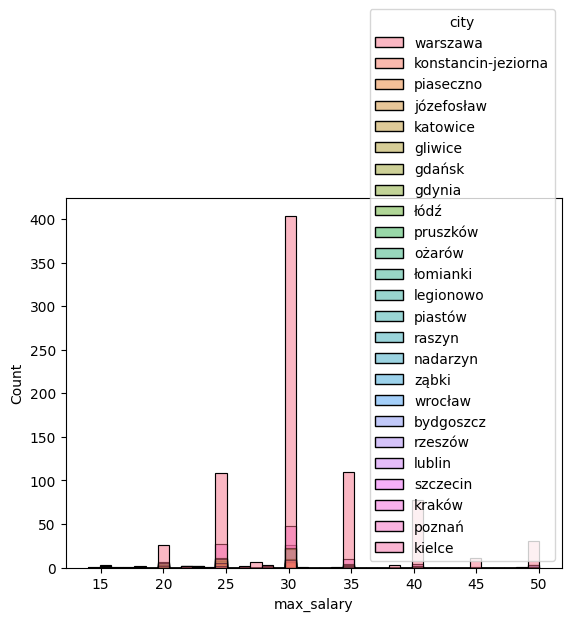

offer_source


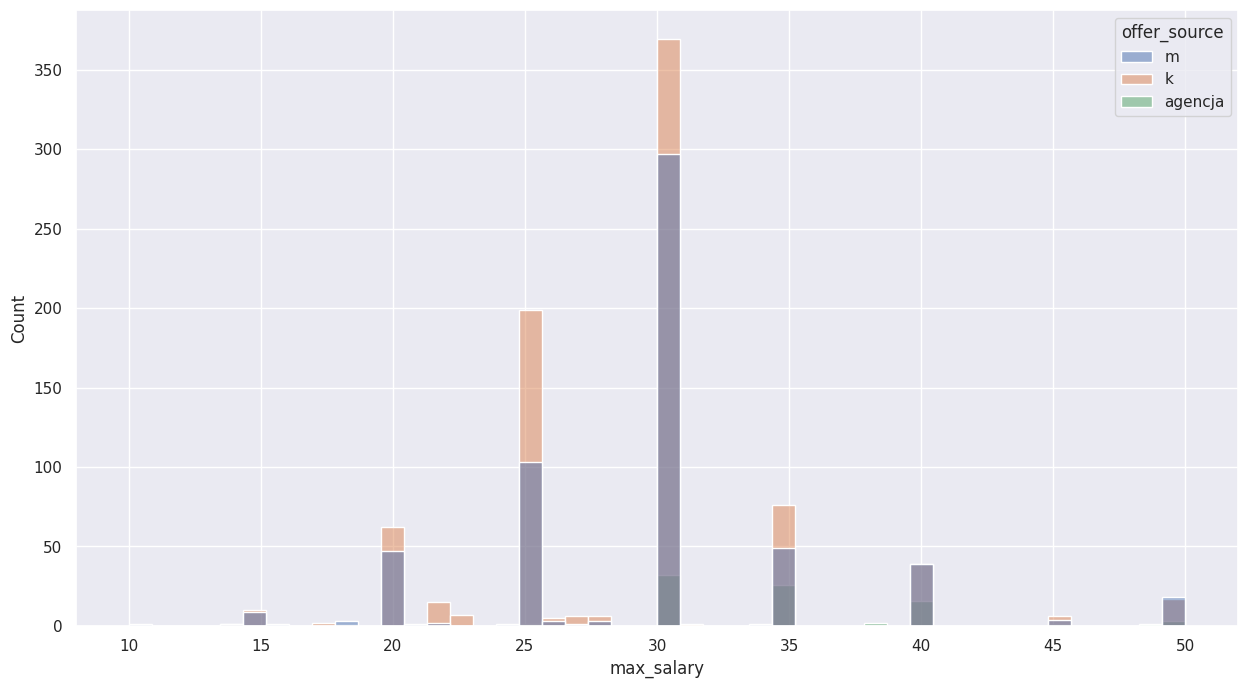

full_time


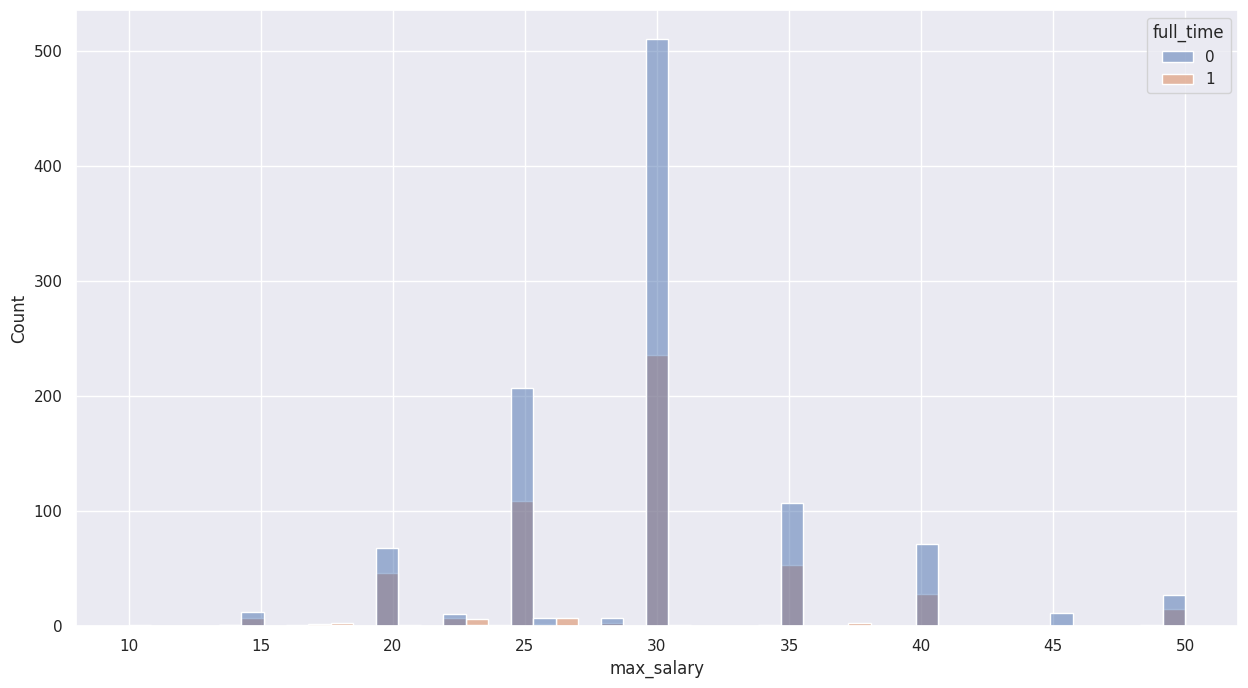

part_time


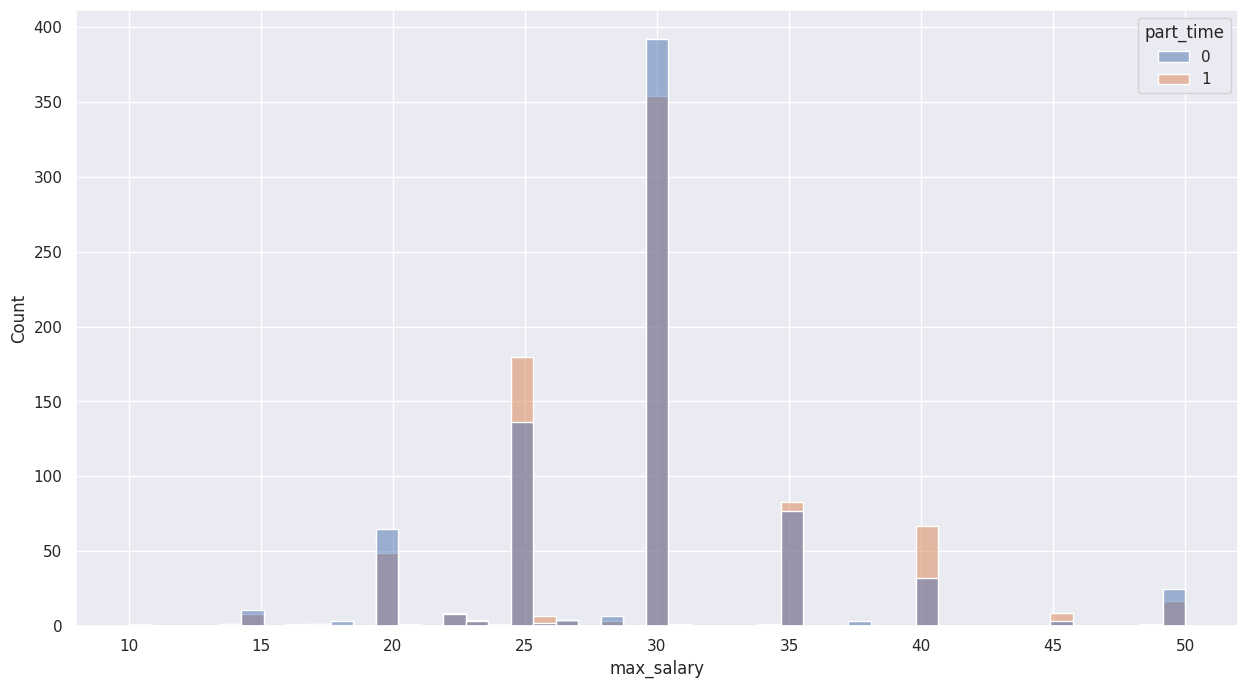

casual


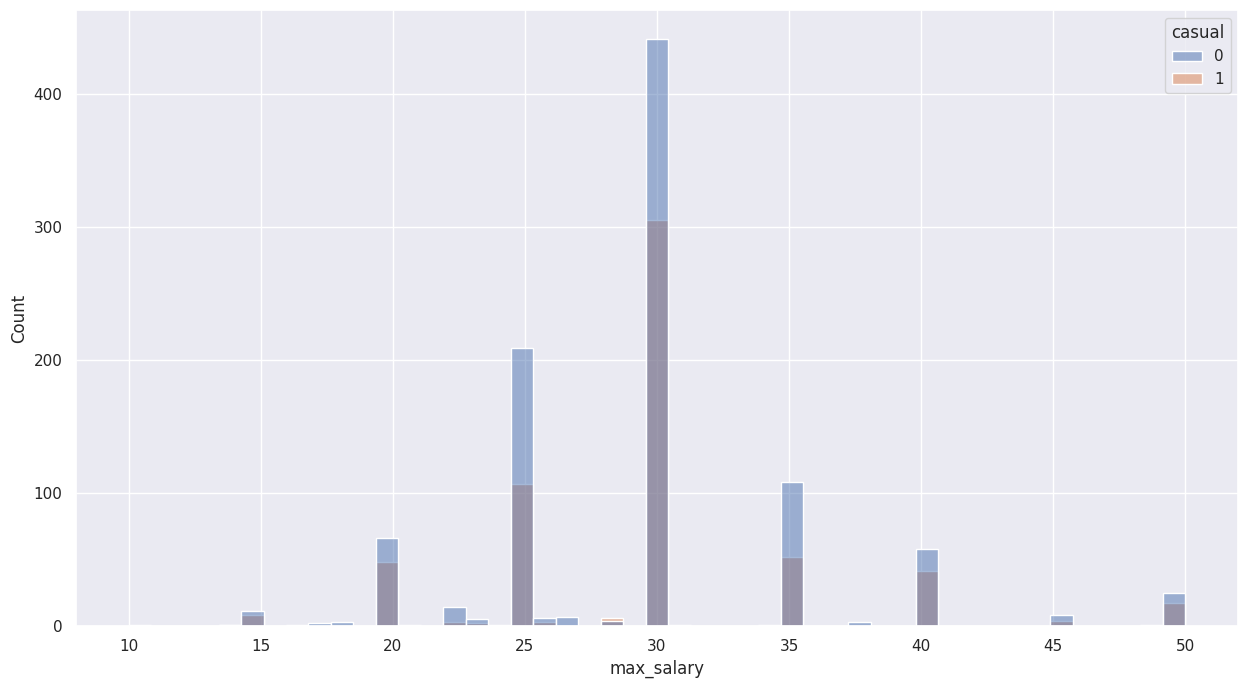

once


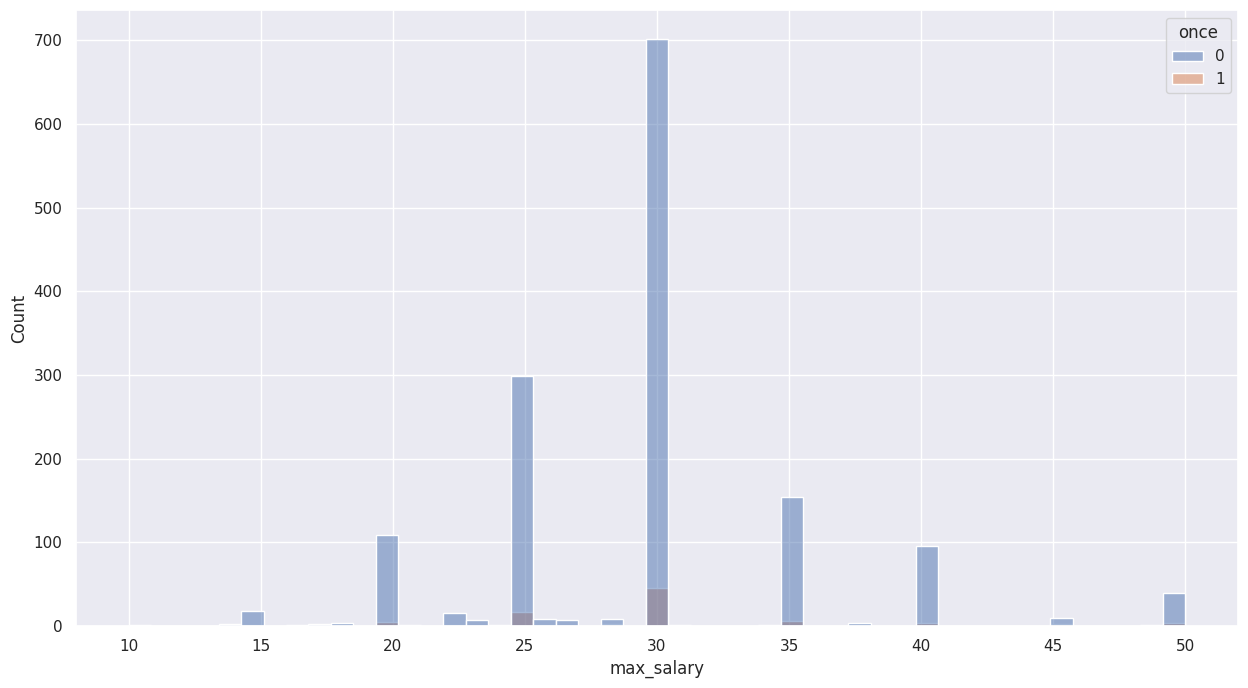

non_smoker


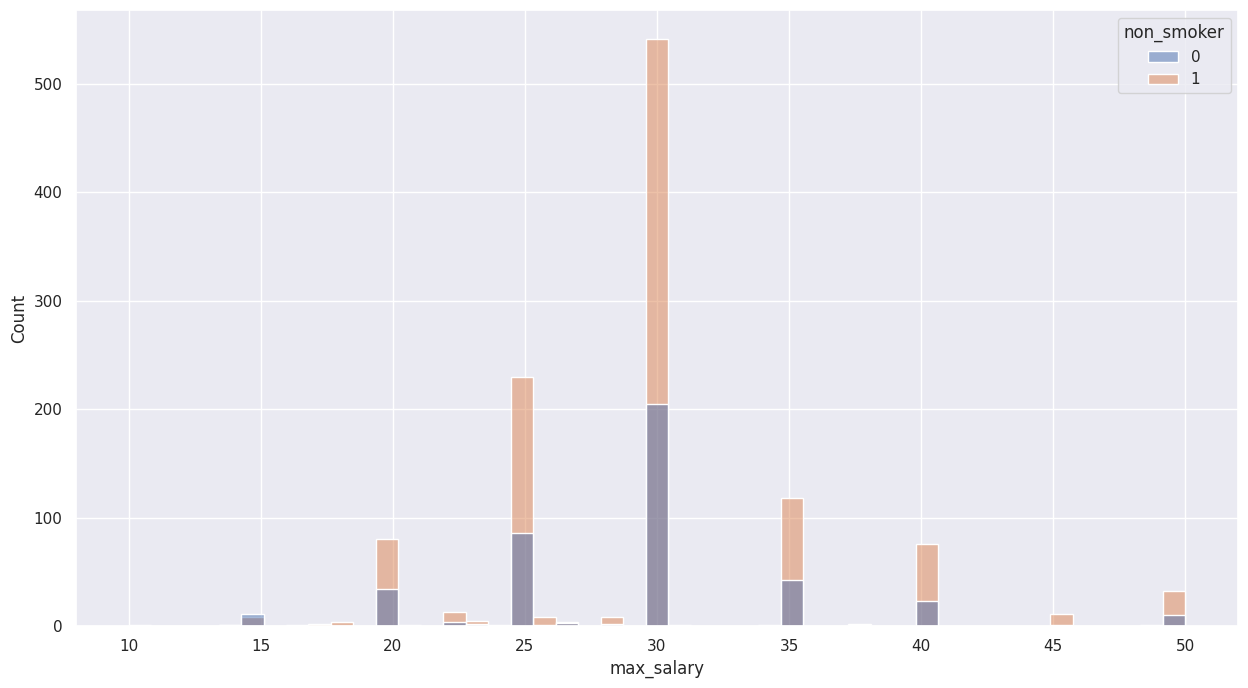

photo


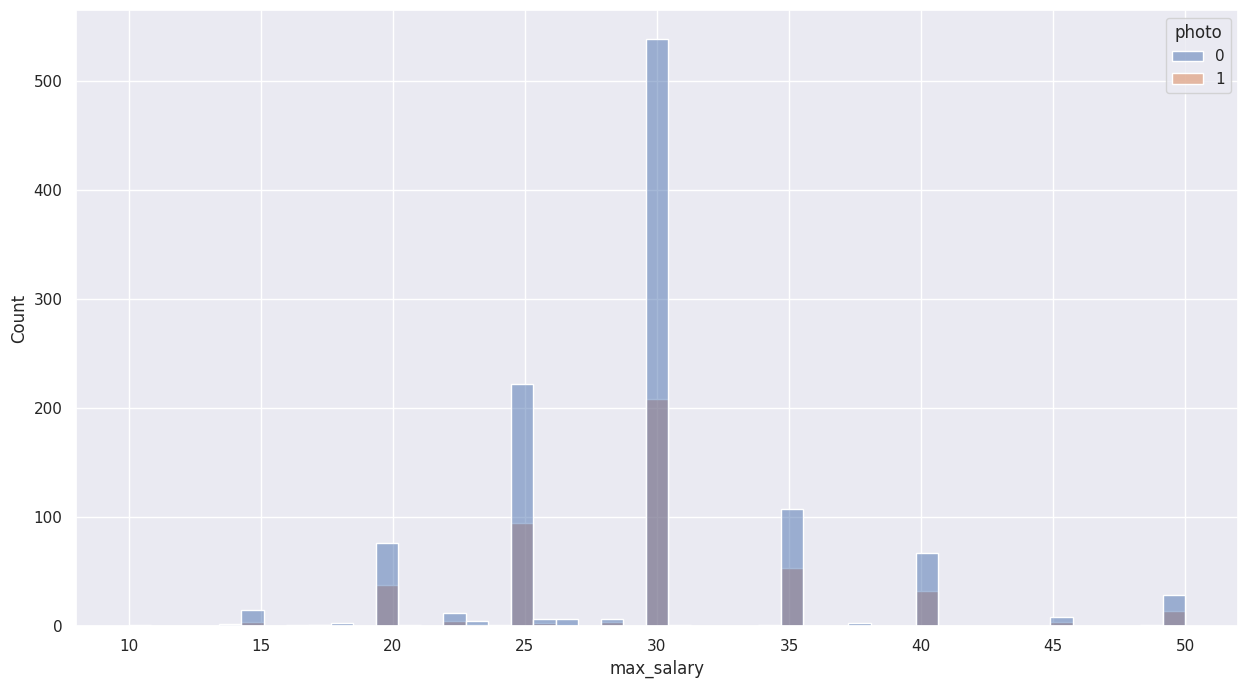

accepts_animals


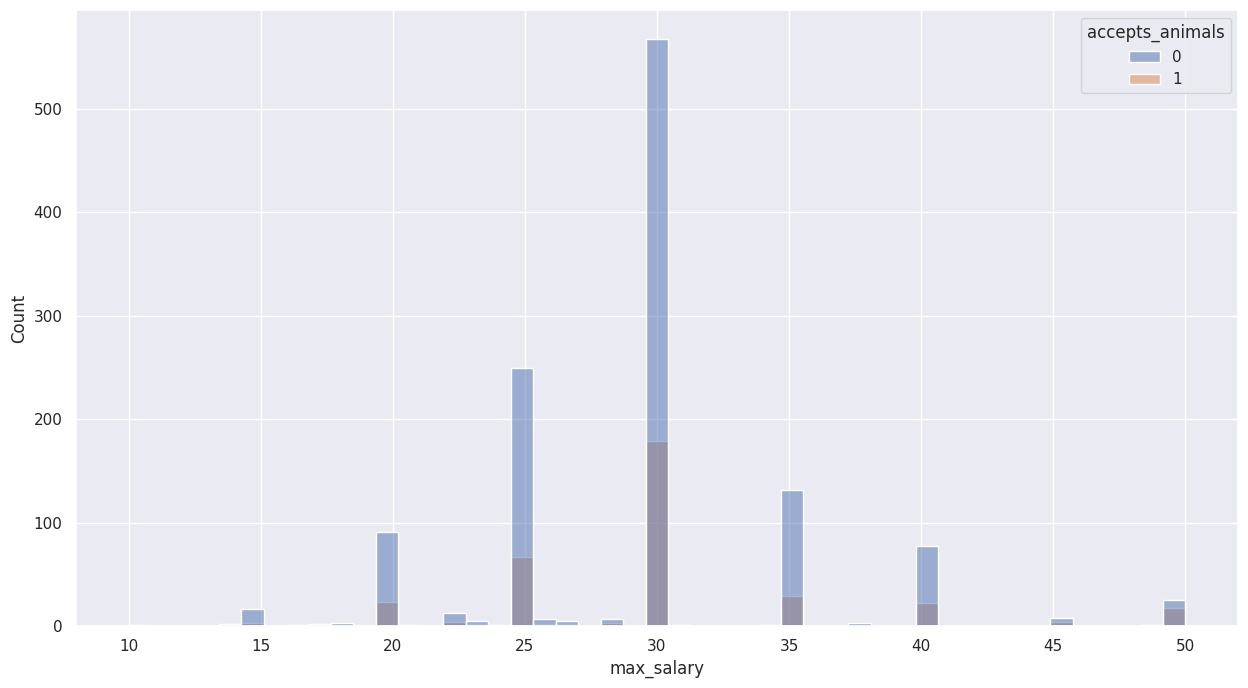

twins_experience


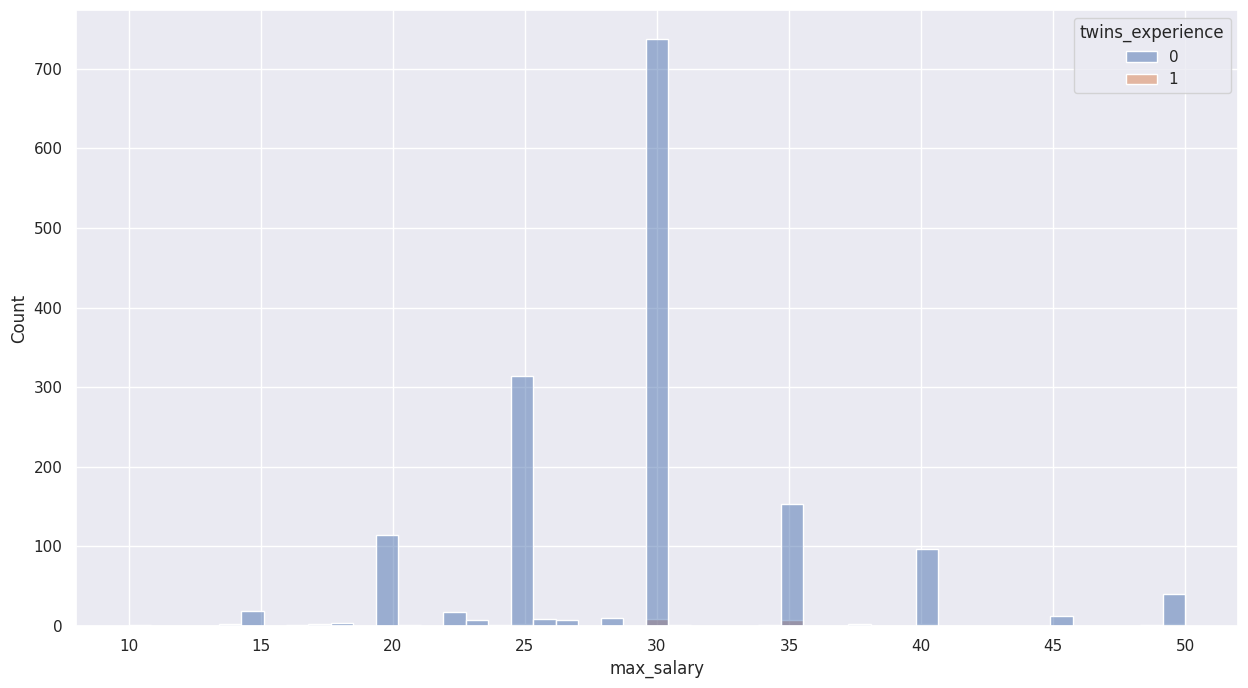

cooking


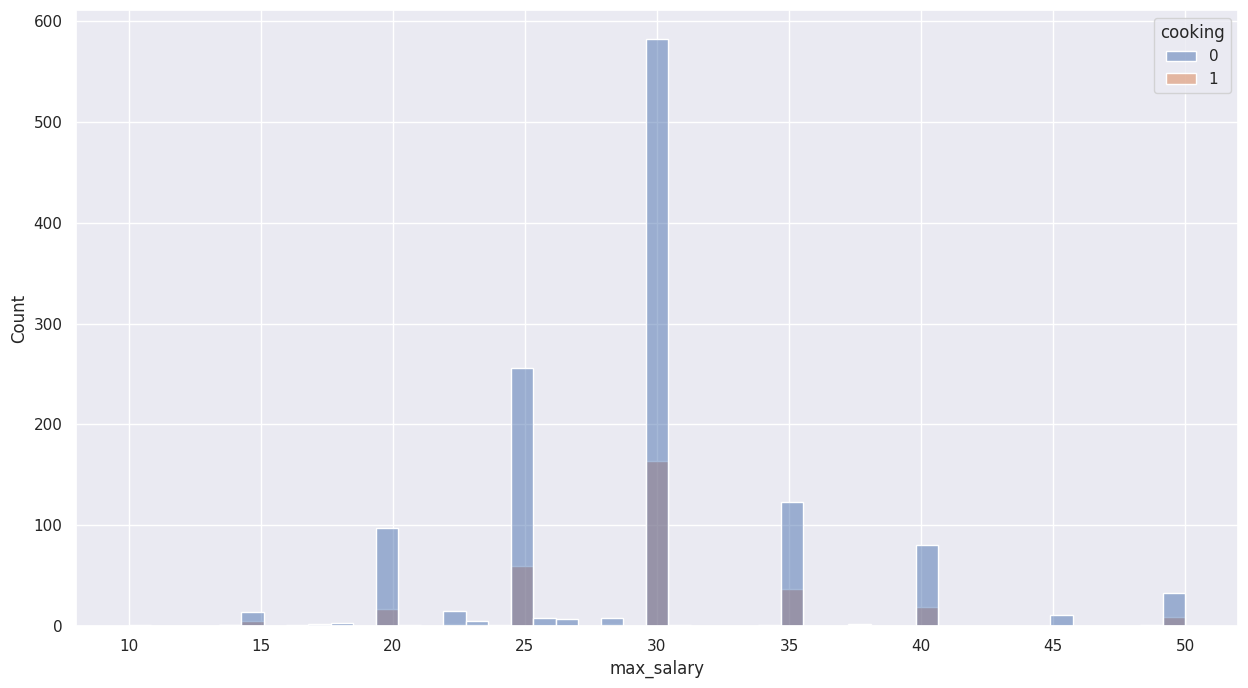

walks


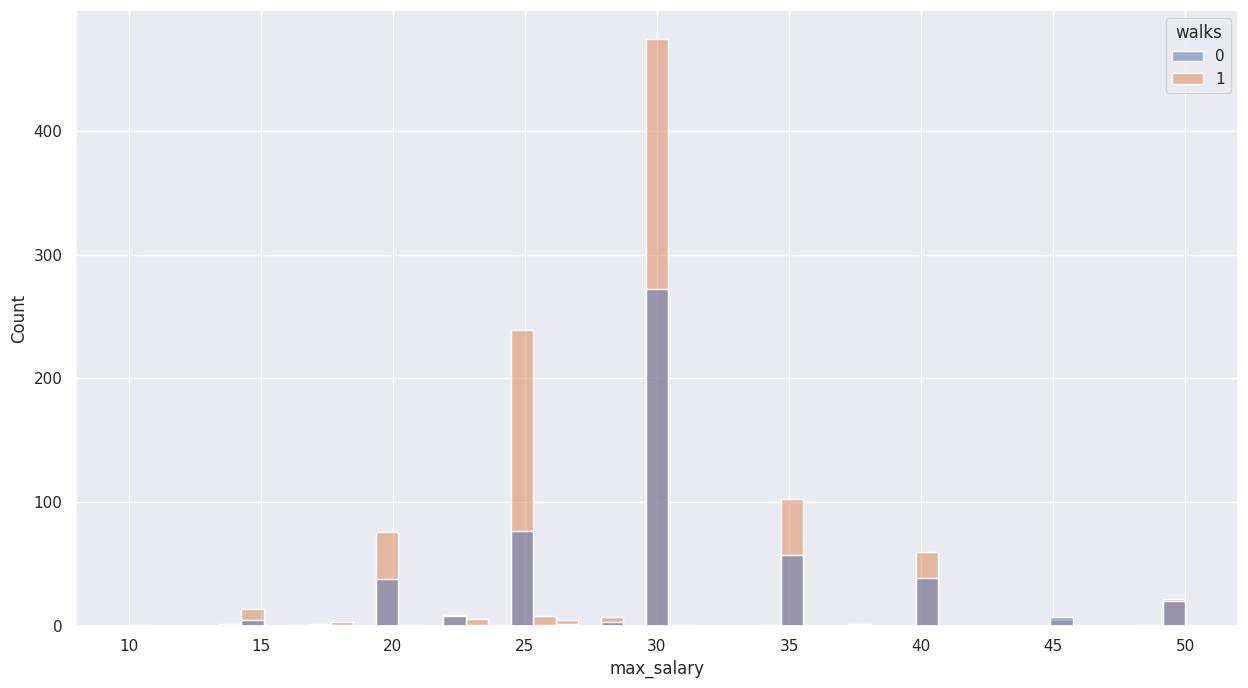

creativity


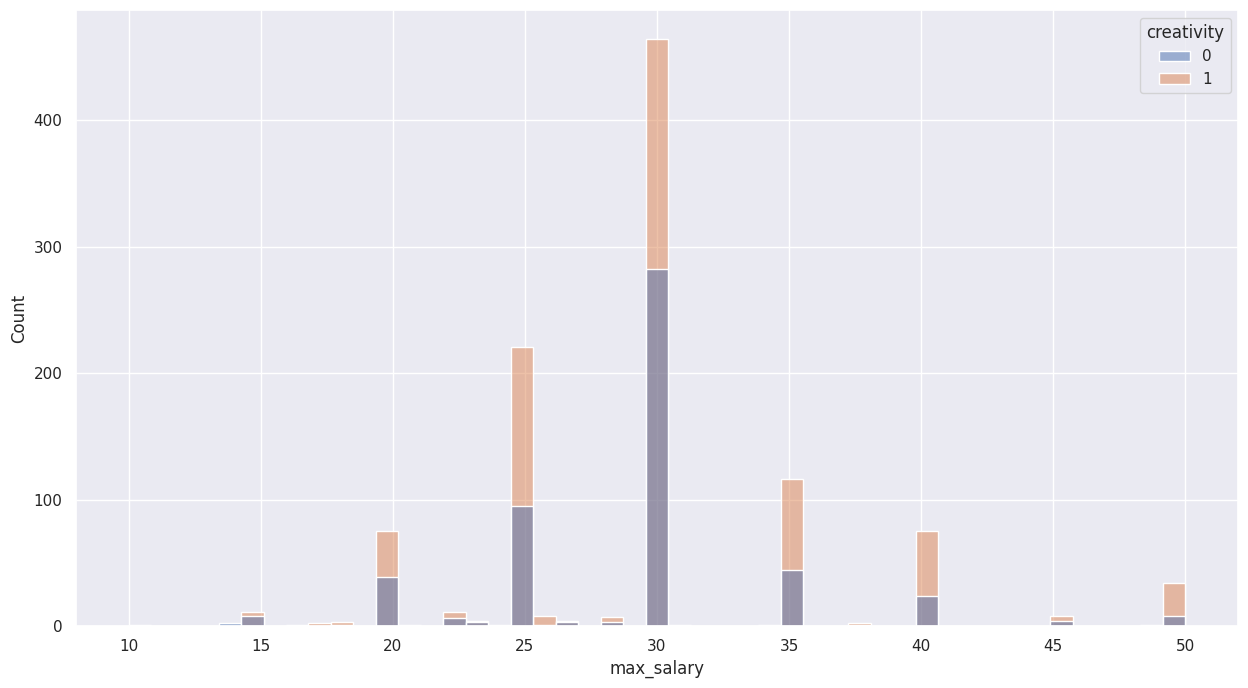

music


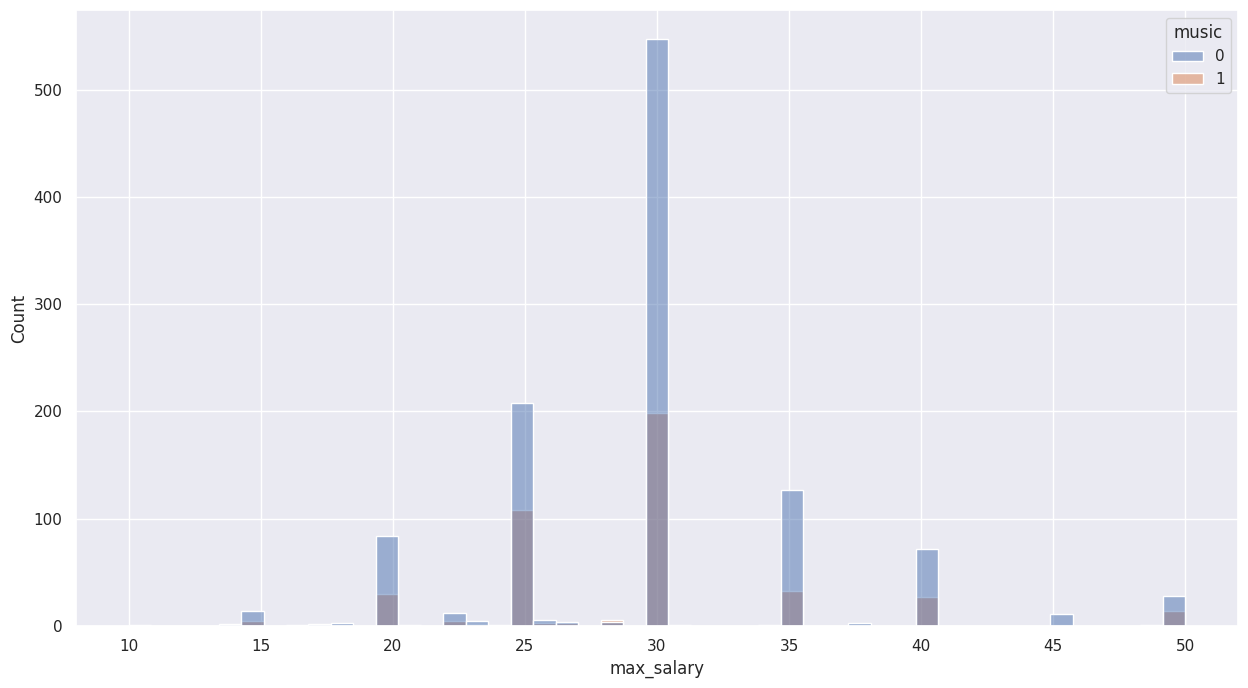

sport


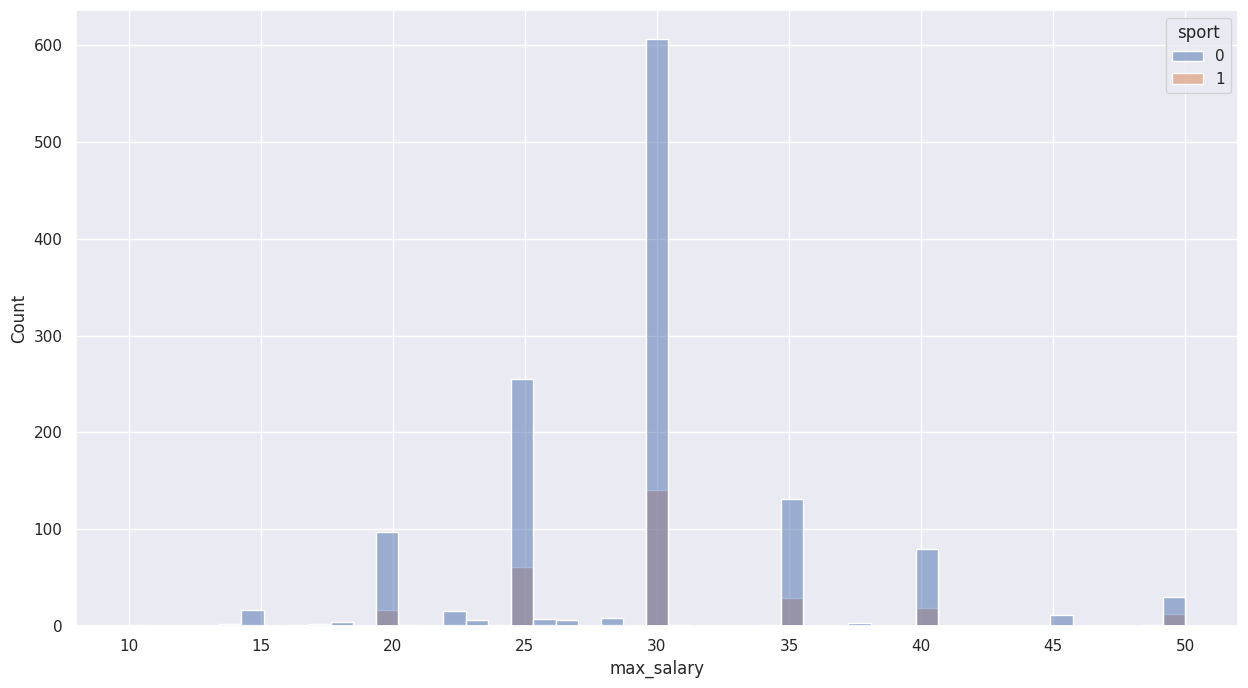

cleaning


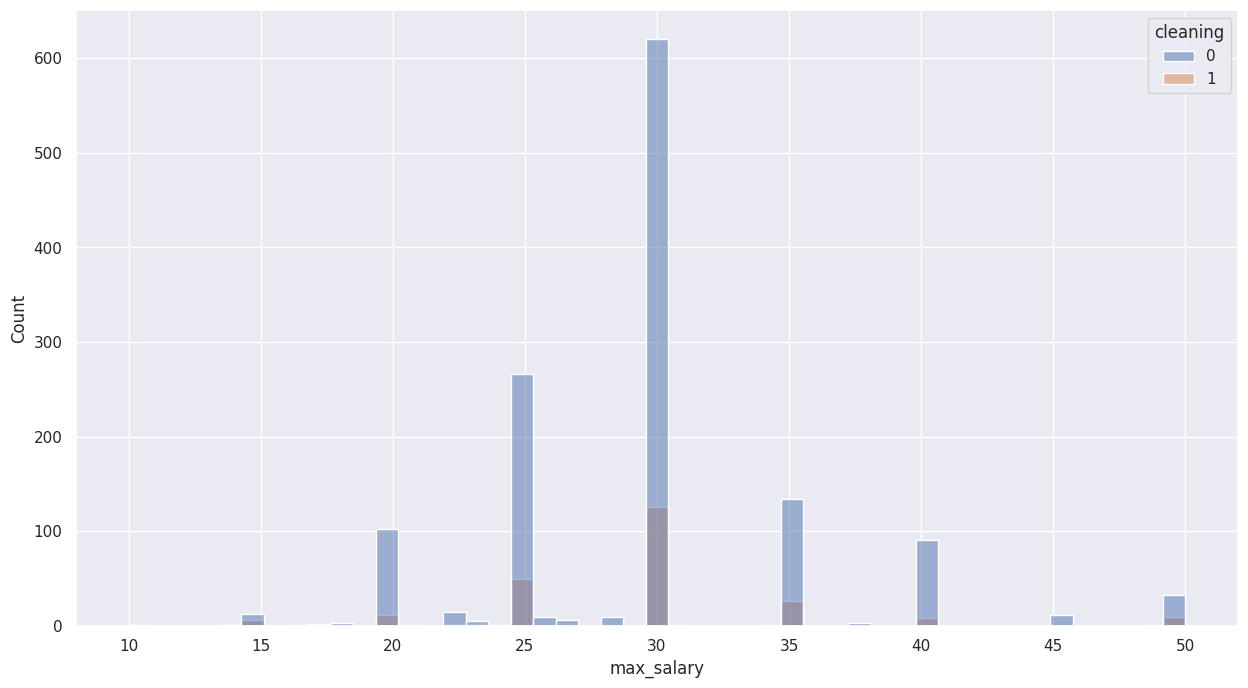

laundry


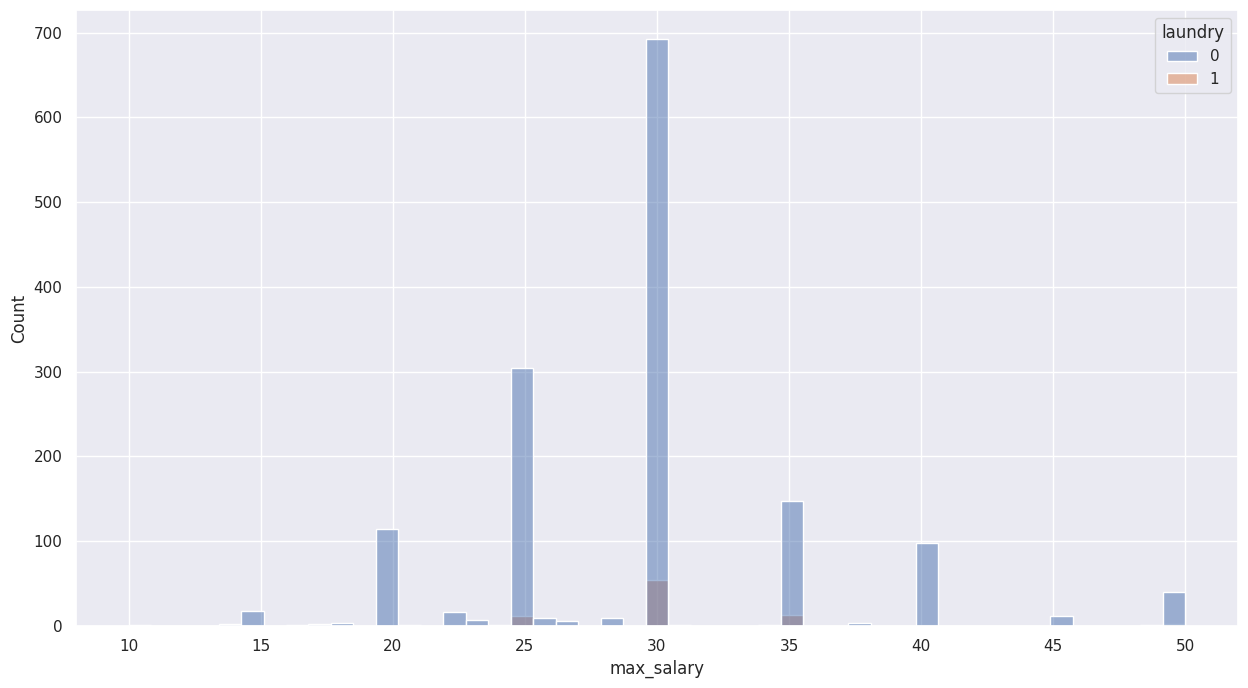

driving_license


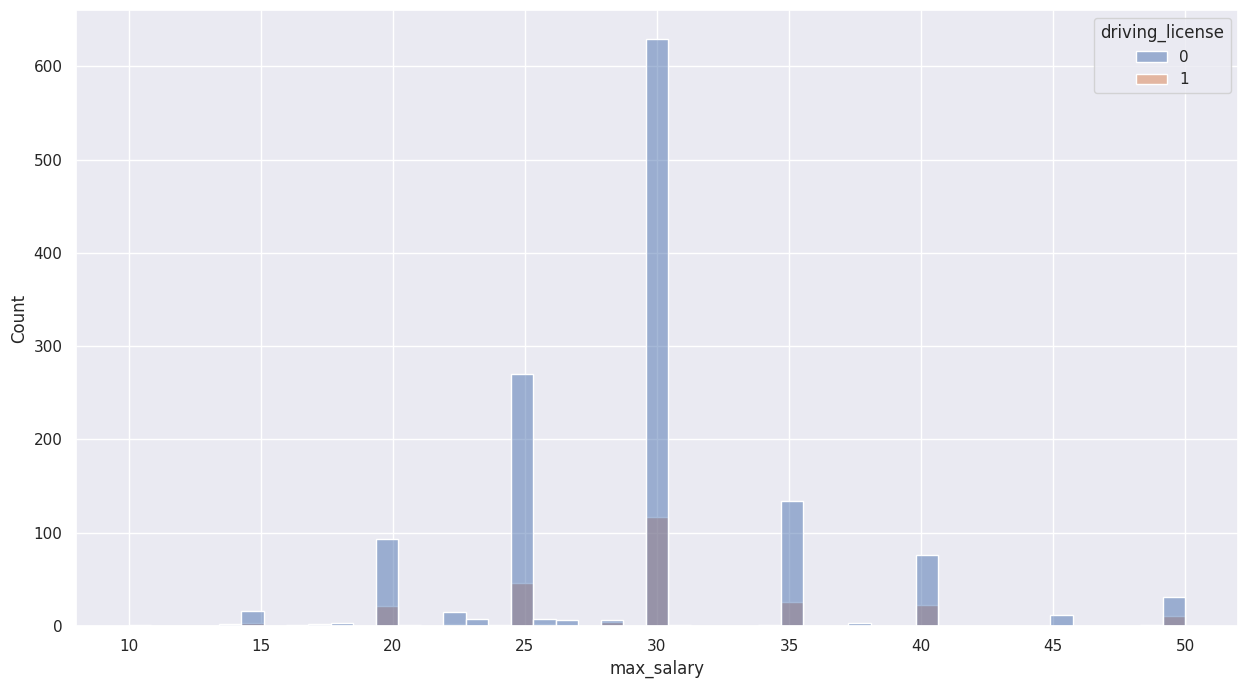

lang1


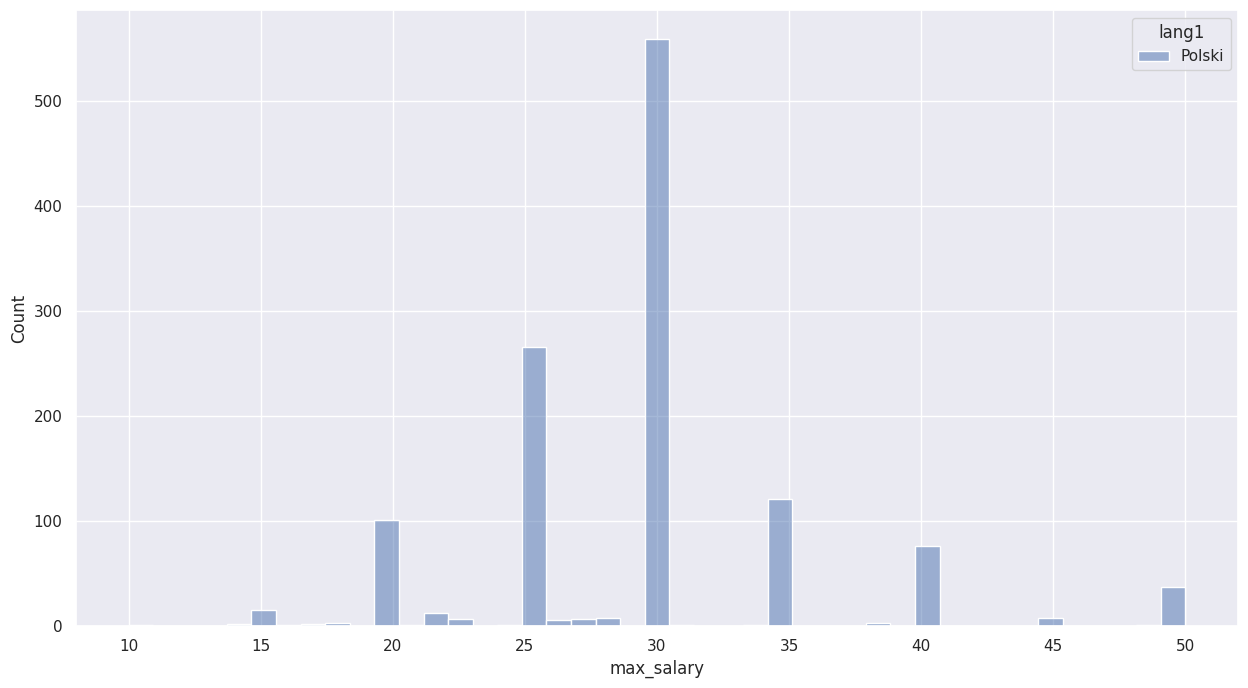

lang2


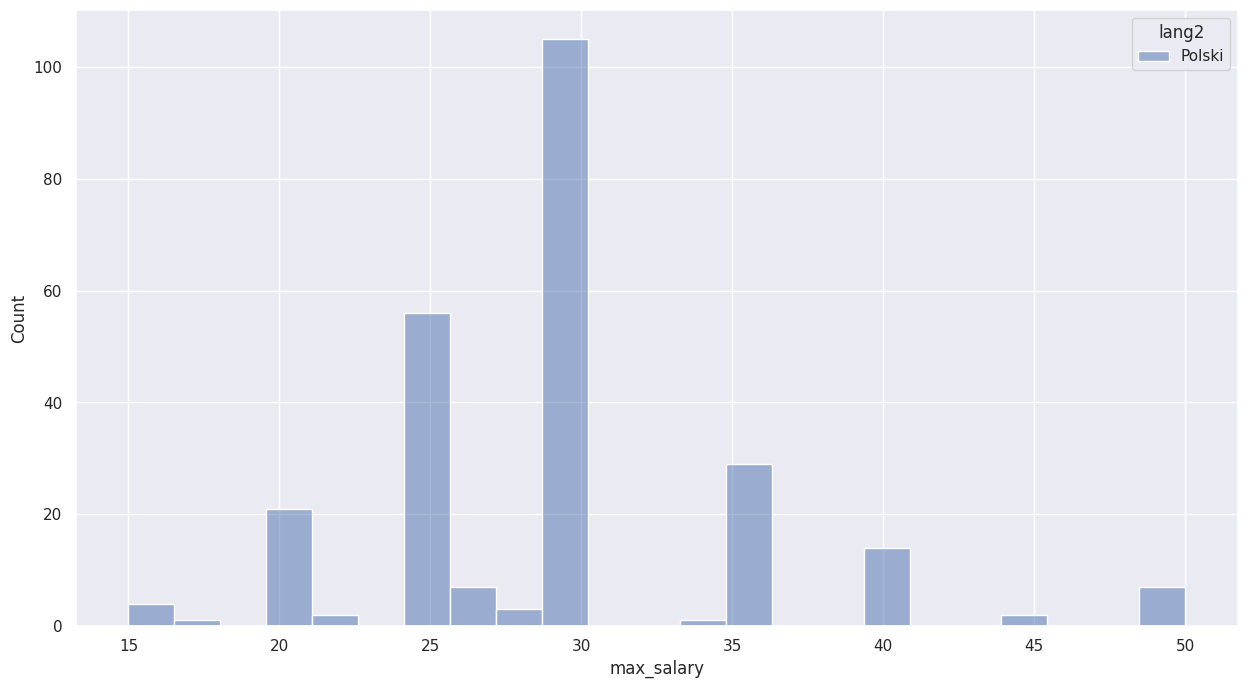

girl


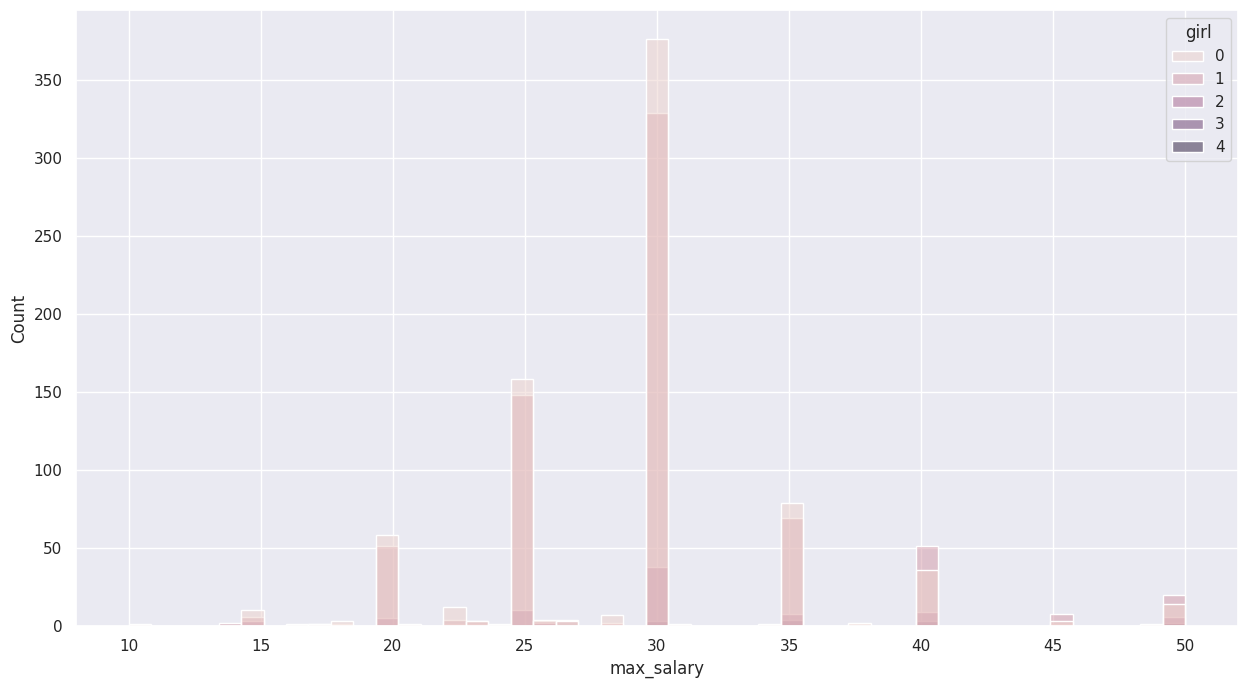

boy


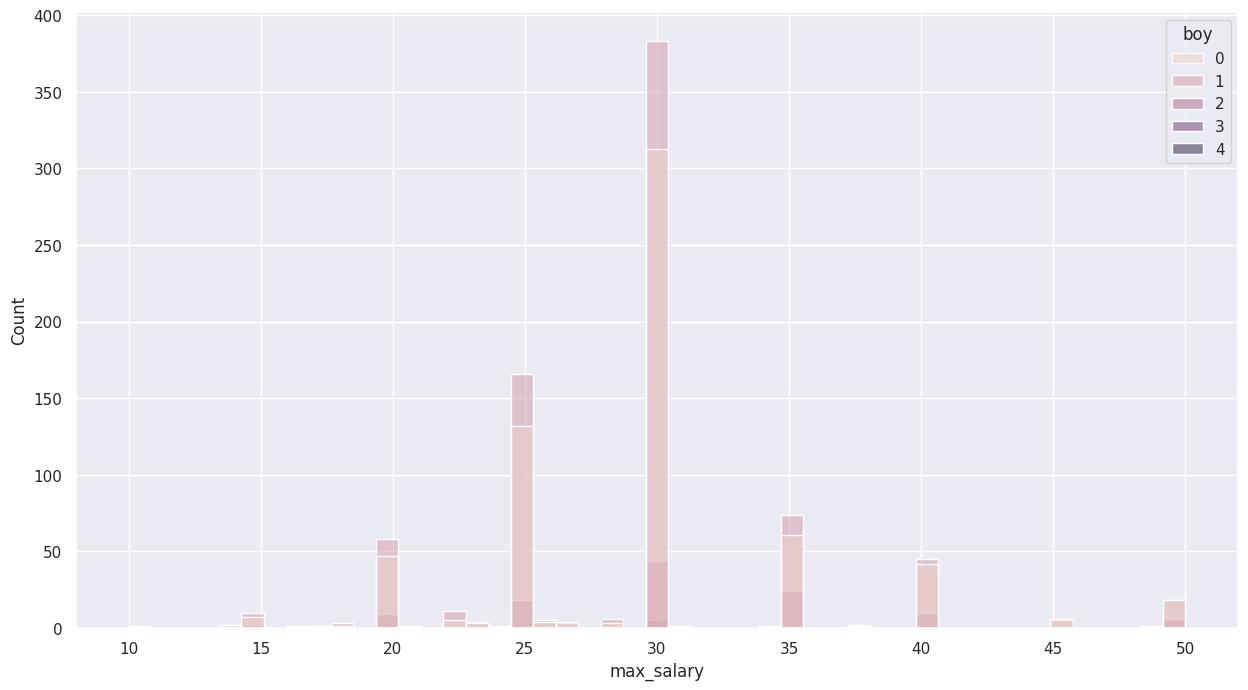

In [70]:
for data in categorical:
    check_distribution(data)

The distribution of data looks good but it's a little bit skewed so it's better to use a test that doesn't rely on the assumption that the distribution of data is normal. For columns with 2 categories of data, I'll perform the U Manna-Whitney test and Kruskal-Wallis test for data with more than 2 categories

In [71]:
def test_umw(col):
     arg = offers[col].unique()
     for x in range(0, 1):
        arg_data = offers[col] == arg[x]
        no_arg_data = offers[col] != arg[x]
        data1 = offers[arg_data].max_salary
        data2 = offers[no_arg_data].max_salary
        
        if len(data1) > 0 and len(data2) > 0:
            result = stats.mannwhitneyu(x=data1, y=data2)
            p = result.pvalue
            results['col'].append(col)
            results['p_value'].append(p)
            if p <= 0.05:
                results['is_significant'].append(1)
            else:
                results['is_significant'].append(0)

In [72]:
for col in categorical:
    test_umw(col)

In [73]:
categorical_many = ['girl', 'boy', 'offer_source', 'n_children']

In [74]:
for element in categorical_many:
    print(element, offers[element].unique())

girl [0 1 2 3 4]
boy [1 0 2 4 3]
offer_source ['m' 'k' 'agencja' nan]
n_children [1 2 3 4 0 5]


In [75]:
def krus_wal300(tab, col):
    arg = tab[col].unique()
    lista = []
    for a in arg:
        arg_data = tab[col] == a
        no_arg_data = tab.loc[arg_data, 'max_salary']
        lista.append(no_arg_data)
    result = stats.kruskal(*lista)
    p = result.pvalue
    
    results = {
        'col': col,
        'p_value': p,
        'is_significant': int(p <= 0.05)
    }
    
    return results

In [76]:
city_data = offers[offers.city.notna()]

In [77]:
source_data = offers[offers.offer_source.notna()]

In [78]:
boy_data = offers[offers.boy.notna()]

In [79]:
girl_data = offers[offers.girl.notna()]

In [80]:
val ={'city':city_data, 'offer_source':source_data, 'boy':boy_data, 'girl':girl_data, 'n_children':offers}

In [81]:
for v in val:
    krus_wal300(val[v], v)

In [82]:
re = pd.DataFrame(results)

- numerical data

In [83]:
nn_age = offers[offers.avg_expected_nannys_age.notna()]

In [84]:
nn_exp = offers[offers.axg_expected_experience.notna()]

In [85]:
numerical = ['date_numeric', 'avg_chld_age']

In [86]:
def kor(col):
        x = offers['full_time'] != 0
        es = sns.lmplot(y="max_salary", x=col, data=offers[x], palette='pastel')
        fig = es.fig
        fig.suptitle(f'Maximum proposed salary for the column: {col}', fontsize = 18)
    
        print(col)

        plt.show()

date_numeric


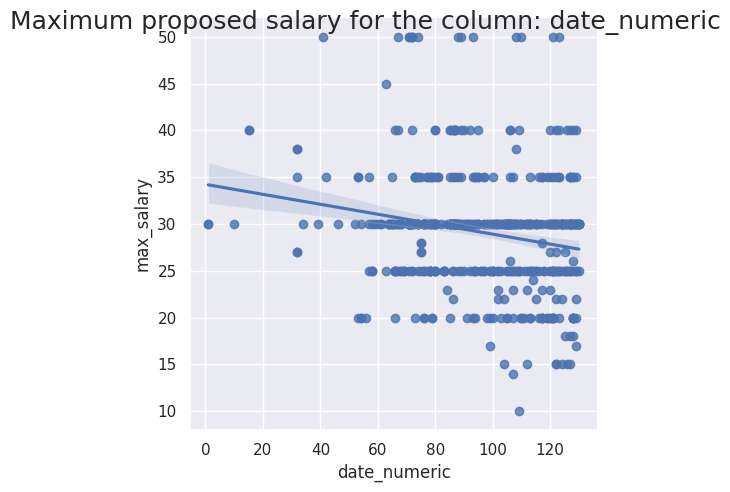

avg_chld_age


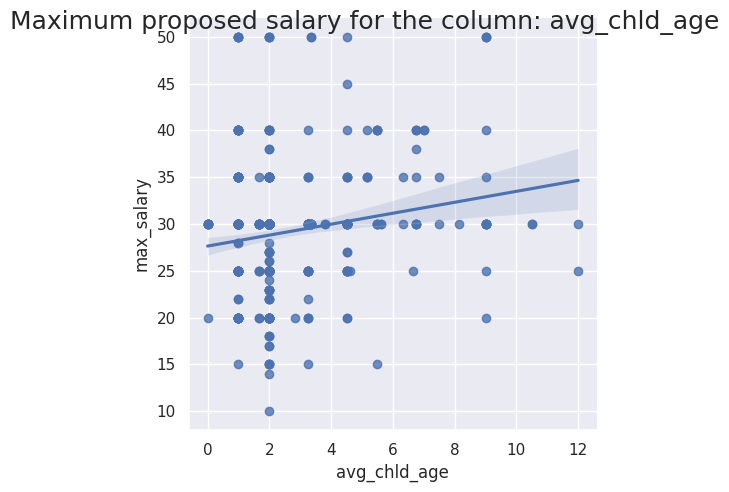

In [87]:
for dane in numerical:
    kor(dane)

As we can see on the plots correlation between the data doesn't exist, to check importance of traits we have to use Spearman correlation. Unlike Pearson's correlation coefficient, which assesses the linear relationship between variables, Spearman's correlation assesses the monotonic relationship, which can be linear or nonlinear.

In [88]:
cor_results = {'col':[], 'p_value':[], 'is_significant':[]}

In [89]:
def scat(df, col):
        d1 = df[col] 
        d2 = df.max_salary
        s = stats.spearmanr(d1, d2)
        p = s.pvalue
        cor_results['col'].append(col)
        cor_results['p_value'].append(p)
        if p < 0.05:
            cor_results['is_significant'].append(1)
        else:
            cor_results['is_significant'].append(0)

In [90]:
for data in numerical:
    scat(offers, data)

In [91]:
scat(nn_age, 'avg_expected_nannys_age')

In [92]:
scat(nn_exp, 'axg_expected_experience')

In [93]:
re.sort_values('p_value')

,col,p_value,is_significant
10,walks,0.000354,1
8,twins_experience,0.000776,1
17,lang1,0.002229,1
1,full_time,0.010678,1
18,girl,0.014195,1
12,music,0.016202,1
15,laundry,0.056102,0
19,boy,0.069199,0
9,cooking,0.130909,0
5,non_smoker,0.132539,0


In [94]:
cor_results = pd.DataFrame(cor_results)
cor_results.sort_values('p_value')

,col,p_value,is_significant
0,date_numeric,1.394494e-08,1
1,avg_chld_age,5.924794e-03,1
3,axg_expected_experience,9.457546e-03,1
2,avg_expected_nannys_age,7.279326e-01,0


**5. Tests explanation**

In the result data frames, there's a features name, p-value and information if the particular feature is significant for the amount of salary. The commonly used threshold for determining statistical significance levels is 0.05 (5%) or 0.01 (1%). In my test, I used the 0.05 threshold. If the calculated p-value is less than or equal to that threshold, it is considered statistically significant, and the null hypothesis(absence of a relationship between variables)  is rejected in favor of the alternative hypothesis(there is some relationship between variables). The features that are significant for categorical data are:
- full time job, polish language, and some of the additional requirements like experience with the tweens

Important features for numerical data are:
- data of posting the offer, average children's age and average nanny experience

**6. Summary and next steps**

Analysis involved:
- Data inspection and verification. Adjusting the data for statistical tests by correcting data type, removing unnecessary columns and adding new ones
- Check of distribution of the data by visualizing the plots
- Perform statistical test(U Manna-Whitney, Kruskal-Wallis, Spearman's correlation)

The proposition of the next steps:
- use the information from statistical tests for feature selection in the creation of ml models that e.g. provide the salary based on the offer data